Implementasikan fuzzy logic untuk menentukan durasi irigasi [menit] dari tiga input: 
- Kelembapan tanah [%]
- Intensitas cahaya [lux]
- Suhu udara [°C]. 

Output diharapkan berupa nilai crisp durasi penyiraman 0–60 menit.

## Import Library
Import library yang diperlukan di sini

In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

## Definisi Variabel dan Semesta Pembicaraan
Definisikan semesta pembicaraan untuk setiap variabel. Silakan sesuaikan rentang sesuai desain kalian.


In [3]:
kelembapan = ctrl.Antecedent(np.arange(0, 101, 1), 'kelembapan')     # 0–100 %
cahaya = ctrl.Antecedent(np.arange(0, 10001, 1), 'cahaya')            # 0–10000 lux
suhu = ctrl.Antecedent(np.arange(10, 46, 1), 'suhu')                  # 10–45 °C

## Desain Fungsi Keanggotaan (MF)

Desain MF minimal 3 label per variabel.
- Input 1: Kelembapan tanah 0–100% dengan minimal 3 label linguistik, misal {kering, sedang, basah}.
- Input 2: Intensitas cahaya 0–10000 lux dengan minimal 3 label, misal {rendah, sedang, tinggi}.
- Input 3: Suhu 10–45°C dengan minimal 3 label, misal {sejuk, hangat, panas}.

Output: Durasi irigasi 0–60 menit dengan minimal 3 label, misal {pendek, sedang, panjang}.

Wajib memvisualisasikan semua fungsi keanggotaan. Bentuk MF bebas, rekomendasi trimf/gaussmf. 

Output: Durasi irigasi 0–60 menit dengan minimal 3 label, misal {pendek, sedang, panjang}.

Jika memungkinkan, visualisasikan fungsi keanggotaan untuk memastikan bentuk dan rentang yang digunakan sudah sesuai logika domain.
(Visualisasi bersifat opsional tetapi sangat disarankan untuk verifikasi desain.)

In [4]:
#Keanggotaan
kelembapan['kering'] = fuzz.trapmf(kelembapan.universe, [0, 0, 20, 50])
kelembapan['sedang'] = fuzz.trimf(kelembapan.universe, [20, 50, 80])
kelembapan['basah']  = fuzz.trapmf(kelembapan.universe, [50, 80, 100, 100])

cahaya['rendah'] = fuzz.trapmf(cahaya.universe, [0, 0, 2000, 4000])
cahaya['sedang'] = fuzz.trimf(cahaya.universe, [2000, 5000, 8000])
cahaya['tinggi'] = fuzz.trapmf(cahaya.universe, [6000, 8000, 10000, 10000])

suhu['sejuk']  = fuzz.trapmf(suhu.universe, [10, 10, 15, 25])
suhu['hangat'] = fuzz.trimf(suhu.universe, [20, 27.5, 35])
suhu['panas']  = fuzz.trapmf(suhu.universe, [30, 40, 45, 45])

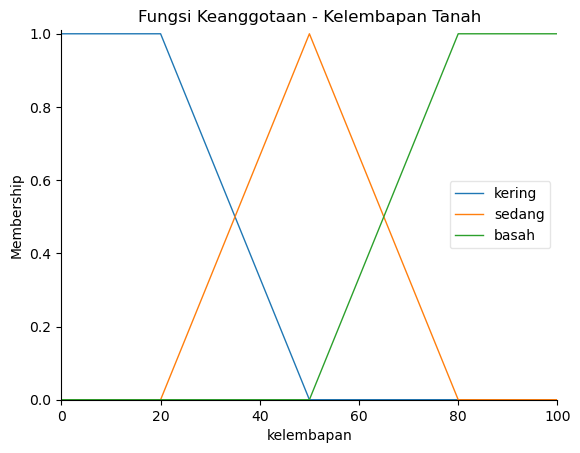

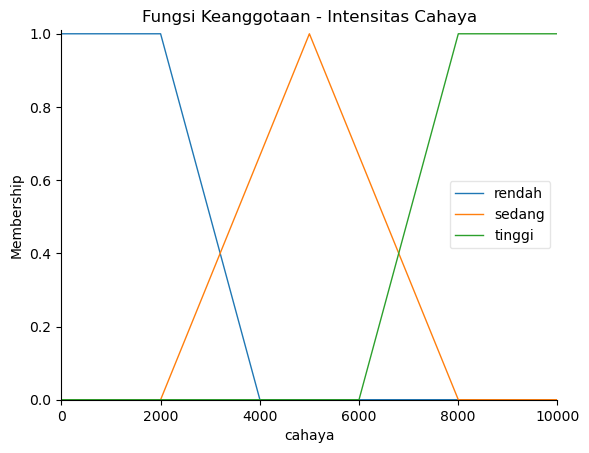

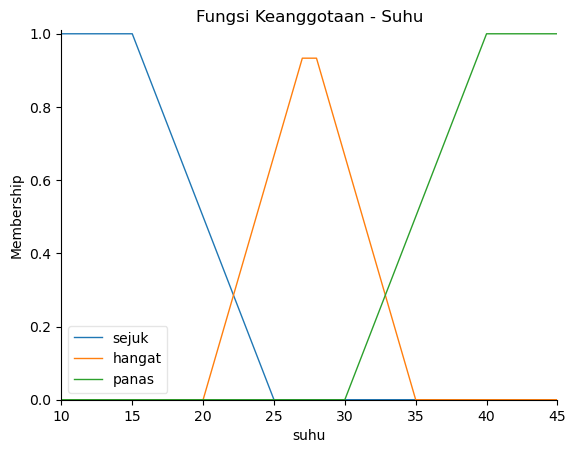

In [9]:
# Contoh fungsi bantu untuk memplot MF 
# def plot_mf(var, title):
#     import matplotlib.pyplot as plt
#     plt.figure()
#     for term in var.terms:
#         plt.plot(var.universe, var[term].mf, label=term)
#     plt.title(title)
#     plt.xlabel('universe')
#     plt.ylabel('membership')
#     plt.legend()
#     plt.show()

# Kelembapan
kelembapan.view()
plt.title('Fungsi Keanggotaan - Kelembapan Tanah')

# Cahaya
cahaya.view()
plt.title('Fungsi Keanggotaan - Intensitas Cahaya')

# Suhu
suhu.view()
plt.title('Fungsi Keanggotaan - Suhu')

plt.show()


## Aturan Fuzzy
Tulis sedikitnya 9 aturan IF–THEN yang masuk akal. Contoh pola:
- Jika tanah kering dan cahaya tinggi dan suhu panas maka durasi panjang.
- Jika tanah basah maka durasi pendek.

In [11]:
durasi = ctrl.Consequent(np.arange(0, 101, 1), 'durasi')

durasi['pendek'] = fuzz.trapmf(durasi.universe, [0, 0, 20, 40])
durasi['sedang'] = fuzz.trimf(durasi.universe, [30, 50, 70])
durasi['panjang'] = fuzz.trapmf(durasi.universe, [60, 80, 100, 100])

In [12]:
rule1 = ctrl.Rule(kelembapan['kering'] & cahaya['tinggi'] & suhu['panas'], durasi['panjang'])
rule2 = ctrl.Rule(kelembapan['kering'] & cahaya['sedang'] & suhu['hangat'], durasi['panjang'])
rule3 = ctrl.Rule(kelembapan['kering'] & cahaya['rendah'] & suhu['sejuk'], durasi['sedang'])

rule4 = ctrl.Rule(kelembapan['sedang'] & cahaya['tinggi'] & suhu['panas'], durasi['panjang'])
rule5 = ctrl.Rule(kelembapan['sedang'] & cahaya['sedang'] & suhu['hangat'], durasi['sedang'])
rule6 = ctrl.Rule(kelembapan['sedang'] & cahaya['rendah'] & suhu['sejuk'], durasi['pendek'])

rule7 = ctrl.Rule(kelembapan['basah'] & cahaya['tinggi'], durasi['pendek'])
rule8 = ctrl.Rule(kelembapan['basah'] & suhu['hangat'], durasi['pendek'])
rule9 = ctrl.Rule(kelembapan['basah'], durasi['pendek'])

## Implementasi Sistem Kontrol
Bangun sistem kontrol fuzzy dari aturan yang telah dibuat, lalu jalankan simulasi.
Pastikan sistem dapat menerima tiga input (kelembapan, cahaya, suhu) dan menghasilkan output durasi penyiraman.
Jalankan contoh satu skenario input untuk memverifikasi bahwa sistem berfungsi dan menghasilkan nilai crisp.

In [13]:
durasi_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3,
    rule4, rule5, rule6,
    rule7, rule8, rule9
])

durasi_simulasi = ctrl.ControlSystemSimulation(durasi_ctrl)

## Uji Input
Lakukan pengujian dengan beberapa kombinasi nilai input berbeda untuk melihat respon sistem.
Tampilkan hasil output crisp (durasi penyiraman) untuk tiap kombinasi dan pastikan hasilnya masuk akal secara logis.
Boleh juga divisualisasikan dalam bentuk tabel atau grafik sederhana agar lebih mudah dianalisis.

Durasi Penyiraman: 83.11111111111109


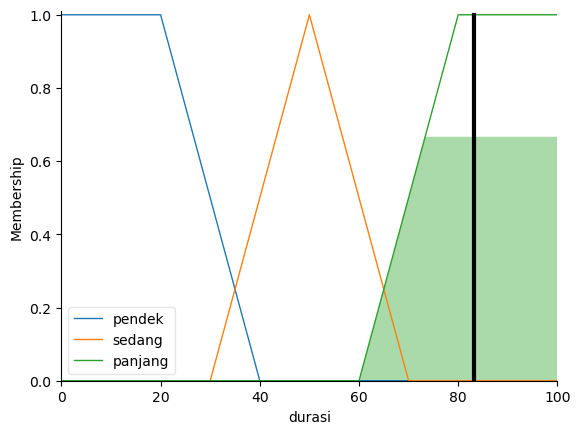

In [14]:
durasi_simulasi.input['kelembapan'] = 30   # kering
durasi_simulasi.input['cahaya'] = 8000     # tinggi
durasi_simulasi.input['suhu'] = 38         # panas

durasi_simulasi.compute()

print("Durasi Penyiraman:", durasi_simulasi.output['durasi'])
durasi.view(sim=durasi_simulasi)